# GeoPandas Heatmap

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geoplot as gplt

In [2]:
time_loc_1 = pd.read_csv("files/pc_time-loc_16NOV.csv")
time_loc_2 = pd.read_csv("files/pc_time-loc_23MAR.csv")
time_loc_3 = pd.read_csv("files/pc_time-loc_24AUG.csv")
time_loc_4 = pd.read_csv("files/pc_time-loc_24FEB.csv")
time_loc_1.head()

,Unnamed: 0,mode,date,tap,time,loc,count
0,0,bus,20201116,off,0:15,2000,19
1,1,bus,20201116,off,0:45,2000,21
2,2,bus,20201116,off,2:15,2007,19
3,3,bus,20201116,off,3:15,2000,22
4,4,bus,20201116,off,4:00,2140,19


Combining all the postcode locations in the four csv files

In [3]:
rpc1 = time_loc_1['loc'].unique()
rpc2 = time_loc_2['loc'].unique()
rpc3 = time_loc_3['loc'].unique()
rpc4 = time_loc_4['loc'].unique()
rpc = list()
for i in rpc1 :
    rpc.append(i)
for i in rpc2 :
    rpc.append(i)
for i in rpc3 :
    rpc.append(i)
for i in rpc4 :
    rpc.append(i)
all_postcodes = []
for x in rpc:
    if x not in all_postcodes:
        all_postcodes.append(x)
all_postcodes.sort()
print(all_postcodes)

[-1, 2000, 2006, 2007, 2008, 2009, 2010, 2011, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2052, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2092, 2093, 2094, 2095, 2096, 2097, 2099, 2100, 2101, 2102, 2103, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2125, 2126, 2127, 2128, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2170, 2171, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2203, 2204,

pc_map is initialised with the first file then filled with the others by running through each file in the 'The_2000' folder.

In [4]:
pc_map = gpd.read_file("files/The_2000/2000.json")
for i in range(2,len(all_postcodes)) :
    filename = "files/The_2000/" + str(all_postcodes[i]) + ".json"
    temp = gpd.read_file(filename)
    pc_map = pc_map.append(temp)

In [5]:
pc_map.head()

,name,geometry
0,2000,"POLYGON ((151.22000 -33.86592, 151.21990 -33.8..."
0,2006,"POLYGON ((151.19493 -33.88437, 151.19490 -33.8..."
0,2007,"POLYGON ((151.19400 -33.87609, 151.19408 -33.8..."
0,2008,"POLYGON ((151.19493 -33.88437, 151.19543 -33.8..."
0,2009,"POLYGON ((151.19829 -33.86847, 151.19807 -33.8..."


<AxesSubplot:>

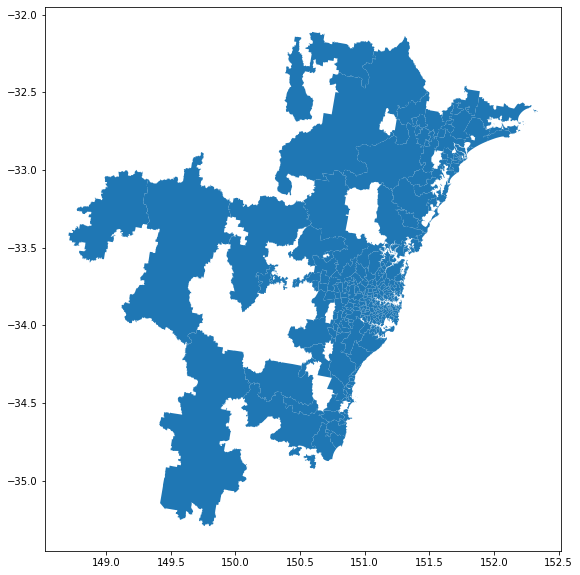

In [6]:
pc_map.plot(figsize=(10,10))

All postcode data is contained within the coordinate bounds of 148 to 153 x and -36 to -32 y

In [7]:
pc_map['geometry'].head()

0    POLYGON ((151.22000 -33.86592, 151.21990 -33.8...
0    POLYGON ((151.19493 -33.88437, 151.19490 -33.8...
0    POLYGON ((151.19400 -33.87609, 151.19408 -33.8...
0    POLYGON ((151.19493 -33.88437, 151.19543 -33.8...
0    POLYGON ((151.19829 -33.86847, 151.19807 -33.8...
Name: geometry, dtype: geometry

There are obvious postcodes missing from the postcodes extracted from the tap on/off dataframes and as such these as missing on the maps. The following gets the full map for the Sydney Area:

In [8]:
import os
directory = 'files/The_2000'

all_pc_map = gpd.read_file("files/The_2000/2000.json")

for filename in os.listdir(directory):
    if filename.endswith(".json"):
        p = str(filename)
        if(p!='2000.json' and p!='2899.json'): #2000 is the starting point so isnt needed and 2899 is an island
            file = "files/The_2000/" + p
            temp = gpd.read_file(file)
            all_pc_map = all_pc_map.append(temp)
        continue
    else:
        continue

<AxesSubplot:>

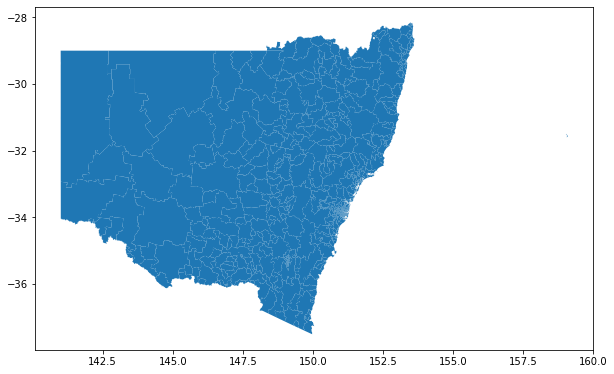

In [9]:
all_pc_map.plot(figsize=(10,10))

Since the entire map is not need, the follow removes all the postcode locations with coordinates outside the region specified earlier: 148 to 153 x and -35.5 to -32 y

The cbd is roughly in the region 150.5 to 151.5 x and -34 to -33.5 y

In [10]:
def xandy(point):
    point = str(point)
    start = point.index('(')
    mid = point.index('-')
    end = point.index(')')
    xcoord = point[start+1:mid-1]
    ycoord = point[mid:end]
    result = [xcoord,ycoord]
    return(result)

In [11]:
thing = gpd.read_file("files/The_2000/2000.json")
thing = thing.representative_point()
testq = xandy(thing)
float(testq[1])

-33.86966

In [12]:
our_pc_map = gpd.read_file("files/The_2000/2000.json")

for filename in os.listdir(directory):
    if filename.endswith(".json"):
        p = str(filename)
        if(p!='2000.json' and p!='2899.json'): #2000 is the starting point so isnt needed and 2899 is an island
            file = "files/The_2000/" + p
            temp = gpd.read_file(file)
            temppoint = temp.representative_point()
            q = xandy(temppoint)
            if(float(q[0])>=148 and float(q[0])<=153 and float(q[1])<=-32 and float(q[1])>=-35.5):
                our_pc_map = our_pc_map.append(temp)
        continue
    else:
        continue

<AxesSubplot:>

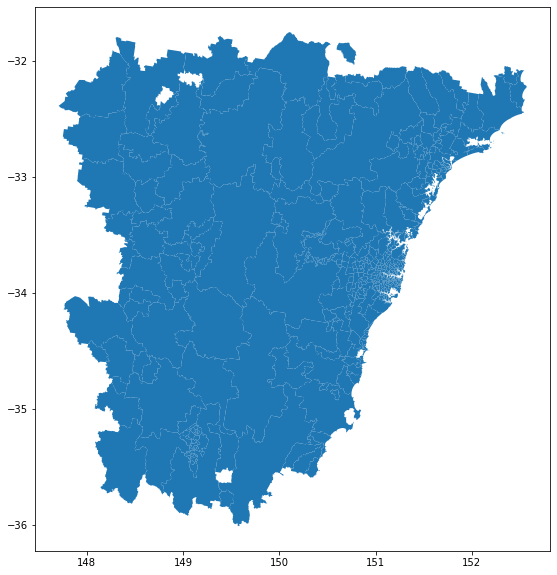

In [13]:
our_pc_map.plot(figsize=(10,10))

This is the postcode map for the entire region where our postcode data is.

In [14]:
cbd_pc_map = gpd.read_file("files/The_2000/2000.json")

for filename in os.listdir(directory):
    if filename.endswith(".json"):
        p = str(filename)
        if(p!='2000.json' and p!='2899.json'): #2000 is the starting point so isnt needed and 2899 is an island
            file = "files/The_2000/" + p
            temp = gpd.read_file(file)
            temppoint = temp.representative_point()
            q = xandy(temppoint)
            if(float(q[0])>=150.5 and float(q[0])<=151.5 and float(q[1])<=-33.5 and float(q[1])>=-34):
                cbd_pc_map = cbd_pc_map.append(temp)
        continue
    else:
        continue

<AxesSubplot:>

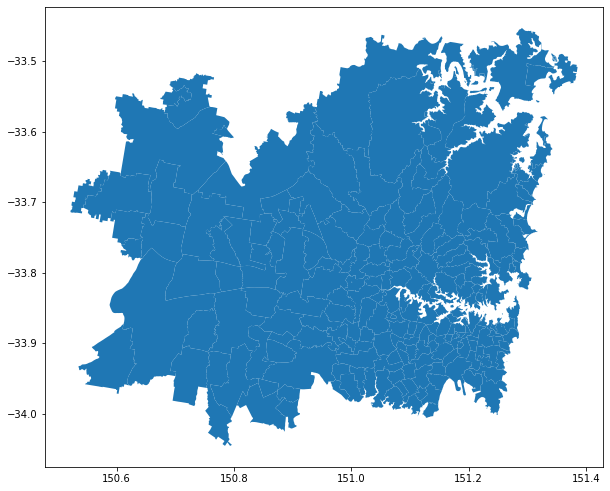

In [15]:
cbd_pc_map.plot(figsize=(10,10))

### Using Geoplot

<AxesSubplot:>

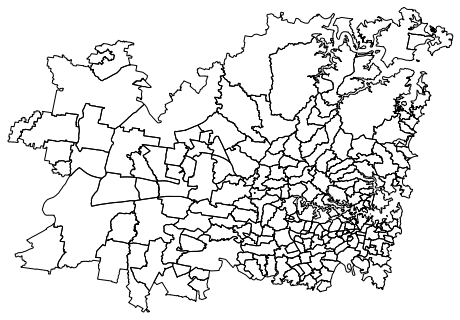

In [16]:
gplt.polyplot(cbd_pc_map)

In [19]:
counts = list()
for i in all_postcodes:
    w = time_loc_1.loc[time_loc_1['loc'] == i, 'count'].sum()
    x = time_loc_2.loc[time_loc_2['loc'] == i, 'count'].sum()
    y = time_loc_3.loc[time_loc_3['loc'] == i, 'count'].sum()
    z = time_loc_4.loc[time_loc_4['loc'] == i, 'count'].sum()
    q = w + x + y + z
    counts.append(q)

df_counts = pd.DataFrame()
df_counts['Postcodes']=all_postcodes
df_counts['Counts']=counts
df_counts = df_counts.drop([0])
df_counts

,Postcodes,Counts
1,2000,13654682
2,2006,153263
3,2007,157970
4,2008,50578
5,2009,128467
...,...,...
313,2782,1099
314,2785,238
315,2790,341
316,2795,58


In [20]:
df_counts['ln']=round(np.log(df_counts['Counts']))
df_counts

,Postcodes,Counts,ln
1,2000,13654682,16.0
2,2006,153263,12.0
3,2007,157970,12.0
4,2008,50578,11.0
5,2009,128467,12.0
...,...,...,...
313,2782,1099,7.0
314,2785,238,5.0
315,2790,341,6.0
316,2795,58,4.0


C:\Users\johnn\anaconda3\envs\my_env\lib\site-packages\geoplot\geoplot.py:1573: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return gpd.GeoSeries(var)


<AxesSubplot:>

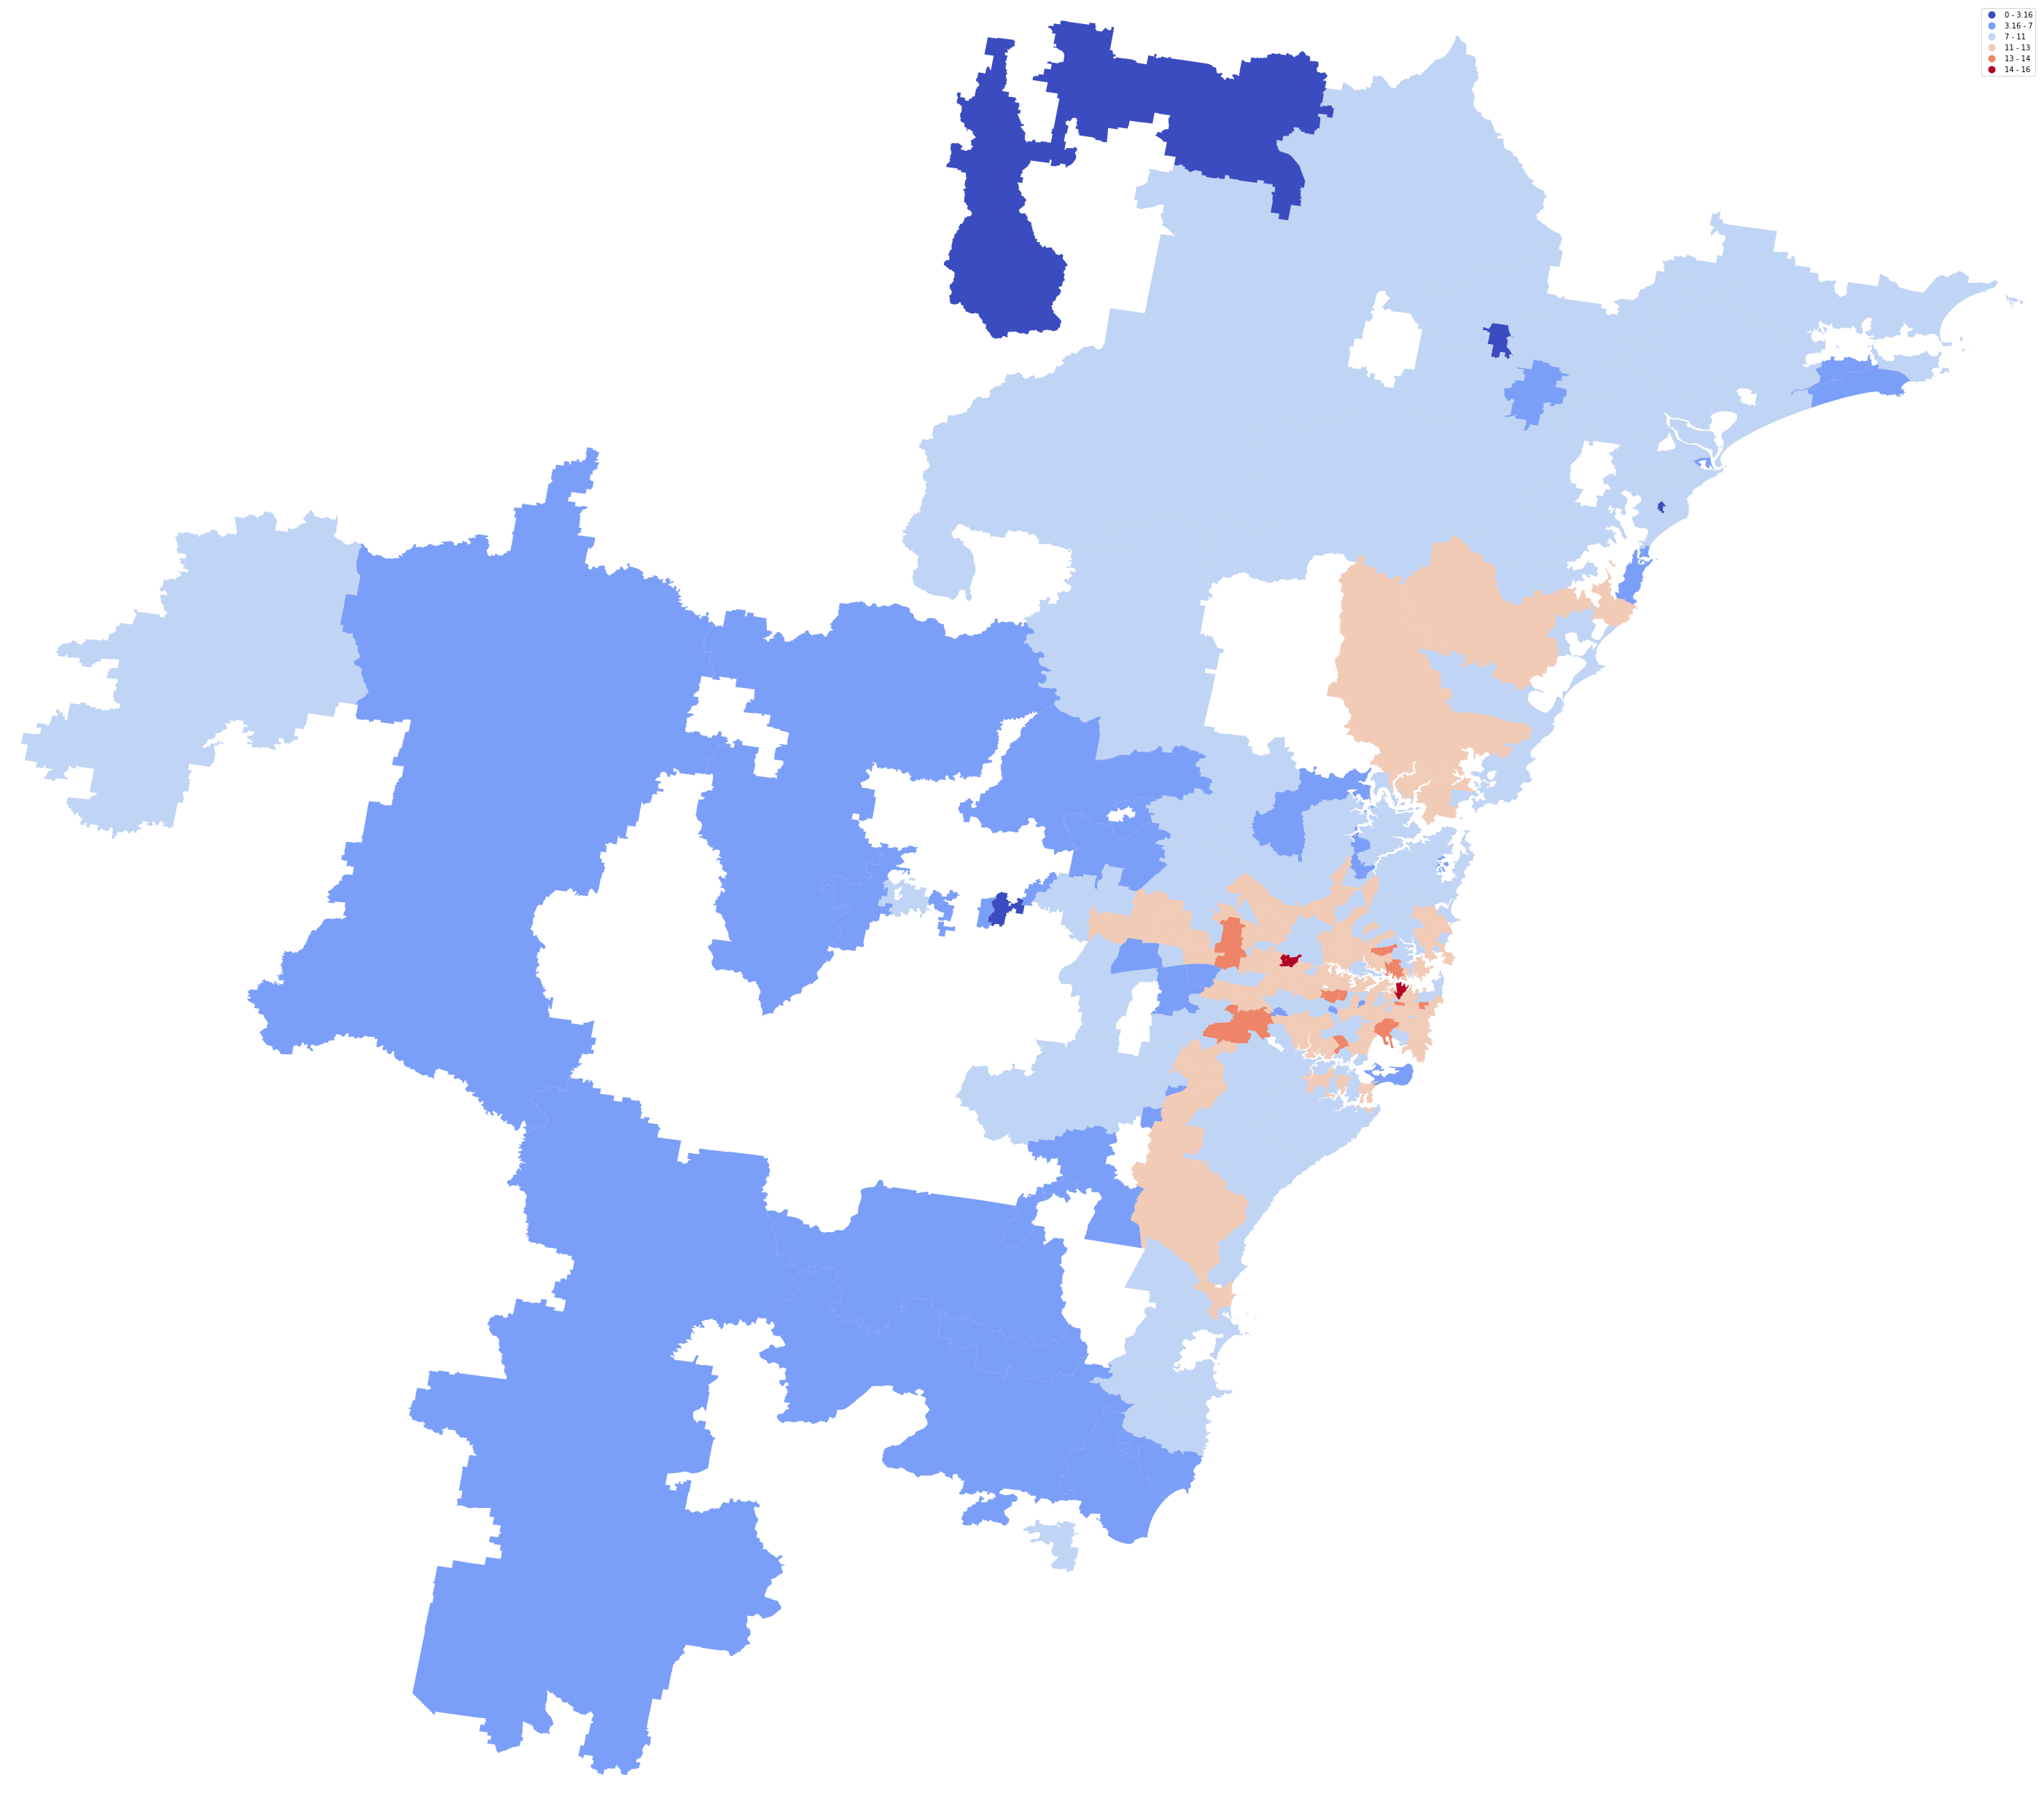

In [30]:
import mapclassify as mc
gplt.choropleth(pc_map,hue=df_counts['ln'],scheme='percentiles',cmap='coolwarm',legend=True,linewidth=0.01,figsize=(50,50))

In [29]:
df_counts_sorted = df_counts.sort_values('Counts', ascending=False)
df_counts_sorted

,Postcodes,Counts,ln
1,2000,13654682,16.0
126,2150,2215851,15.0
15,2022,1604757,14.0
52,2067,1227737,14.0
113,2135,1118240,14.0
...,...,...,...
294,2758,37,4.0
310,2778,23,3.0
246,2333,21,3.0
247,2334,18,3.0
